In [51]:
import panda_py
from panda_py import constants

In [52]:
from panda_py import constants
start_pose = panda_py.fk(constants.JOINT_POSITION_START)

In [105]:
pose =  start_pose.copy()
pose[0,3] = 0.4
pose[1,3] = 0.0
pose[2,3] = 0.1
print(pose)

[[ 1.00000000e+00  6.12323400e-17 -6.12323400e-17  4.00000000e-01]
 [ 6.12323400e-17 -1.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-1.11022302e-16  0.00000000e+00 -1.00000000e+00  1.00000000e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


In [106]:
panda_py.ik(pose)

array([nan, nan, nan, nan, nan, nan, nan])

In [52]:
start_pose[:3,:3]

array([[ 1.00000000e+00,  6.12323400e-17, -6.12323400e-17],
       [ 6.12323400e-17, -1.00000000e+00,  0.00000000e+00],
       [-1.11022302e-16,  0.00000000e+00, -1.00000000e+00]])

In [53]:
start_pose[:3,3]

array([0.30689057, 0.        , 0.48728205])

# rtb

In [1]:
import roboticstoolbox as rtb

In [2]:
robot = rtb.models.Panda()
print(robot)

ERobot: panda (by Franka Emika), 7 joints (RRRRRRR), 1 gripper, geometry, collision
┌─────┬──────────────┬───────┬─────────────┬────────────────────────────────────────────────┐
│link │     link     │ joint │   parent    │              ETS: parent to link               │
├─────┼──────────────┼───────┼─────────────┼────────────────────────────────────────────────┤
│   0 │ panda_link0  │       │ BASE        │ SE3()                                          │
│   1 │ panda_link1  │     0 │ panda_link0 │ SE3(0, 0, 0.333) ⊕ Rz(q0)                      │
│   2 │ panda_link2  │     1 │ panda_link1 │ SE3(-90°, -0°, 0°) ⊕ Rz(q1)                    │
│   3 │ panda_link3  │     2 │ panda_link2 │ SE3(0, -0.316, 0; 90°, -0°, 0°) ⊕ Rz(q2)       │
│   4 │ panda_link4  │     3 │ panda_link3 │ SE3(0.0825, 0, 0; 90°, -0°, 0°) ⊕ Rz(q3)       │
│   5 │ panda_link5  │     4 │ panda_link4 │ SE3(-0.0825, 0.384, 0; -90°, -0°, 0°) ⊕ Rz(q4) │
│   6 │ panda_link6  │     5 │ panda_link5 │ SE3(90°, -0°, 0°) ⊕ Rz(q5

In [3]:
Te = robot.fkine(robot.qr)  # forward kinematics
print(Te)

   0.995     0         0.09983   0.484     
   0        -1         0         0         
   0.09983   0        -0.995     0.4126    
   0         0         0         1         



In [118]:
from spatialmath import SE3

Tep = sm.SE3.Trans(0.4, 0.0, 0.1) * sm.SE3.RPY([np.pi/2, 0, 0])
sol = robot.ik_LM(Tep)         # solve IK
print(sol)

(array([ 1.89685138,  1.63412392, -1.0794334 , -2.33331373,  0.23309848,
        2.05927494,  1.12816698]), 1, 214, 20, 1.1567865218215355e-10)


In [119]:
q_pickup = sol[0]
print(robot.fkine(q_pickup))    # FK shows that desired end-effector pose was achieved

   1        -4.776e-06  6.022e-06  0.4       
   6.022e-06  9.057e-06 -1        -6.06e-06  
   4.776e-06  1         9.057e-06  0.1       
   0         0         0         1         



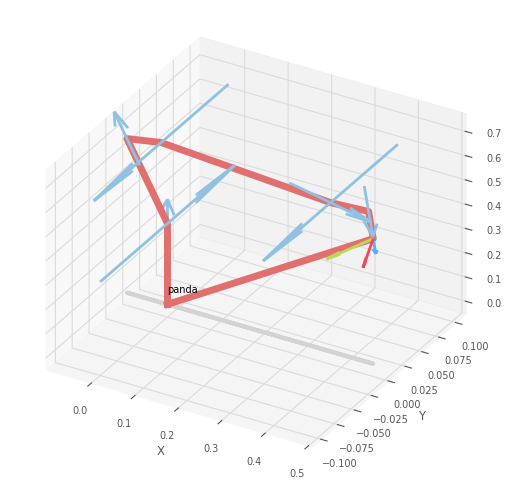

PyPlot3D backend, t = 2.499999999999999, scene:
  robot: Text(0.0, 0.0, 'panda')

<Figure size 640x480 with 0 Axes>

In [120]:
qt = rtb.jtraj(robot.qr, q_pickup, 50)
robot.plot(qt.q, backend='pyplot', movie='panda1.gif')

In [8]:
robot.plot(qt.q)

Swift backend, t = 2.499999999999999, scene:
  panda

In [117]:
import swift
import roboticstoolbox as rtb
import spatialmath as sm
import numpy as np

env = swift.Swift()
env.launch(realtime=True)

panda = rtb.models.Panda()
panda.q = panda.qr

Tep = sm.SE3.Trans(0.4, 0.0, 0.1) * sm.SE3.RPY([np.pi/2, 0, 0])

arrived = False
env.add(panda)

dt = 0.001
import time
while not arrived:
    v, arrived = rtb.p_servo(panda.fkine(panda.q), Tep, 1)
    panda.qd = np.linalg.pinv(panda.jacobe(panda.q)) @ v
    env.step(dt)

# Uncomment to stop the browser tab from closing
# env.hold()

In [73]:
Tep[0]

   0.995     0         0.09983   0.3648    
   0        -1         0         0         
   0.09983   0        -0.995    -0.1018    
   0         0         0         1         


In [115]:
sm.SE3.Trans(0.4, 0.0, 0.1) * sm.SE3.RPY([np.pi/2, 0, 0])

   1         0         0         0.4       
   0         0        -1         0         
   0         1         0         0.1       
   0         0         0         1         


In [90]:
panda.fkine(panda.qr) * sm.SE3.Trans(-0.1, 0.0, 0.4)

   0.995     0         0.09983   0.4245    
   0        -1         0         0         
   0.09983   0        -0.995     0.004645  
   0         0         0         1         


In [102]:
sm.SE3.RPY([np.pi, 0, 0])

   1         0         0         0         
   0        -1         0         0         
   0         0        -1         0         
   0         0         0         1         


In [81]:
x= panda.fkine(panda.qr)

In [85]:
x.

AttributeError: can't set attribute